In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

## Create some fake data

In [2]:
def f(x):
    return(2*x+1)
x1=3*np.random.randn(30,2)
a=np.min(x1)
b=np.max(x1)
x=np.linspace(a,b)
y1=f(x)

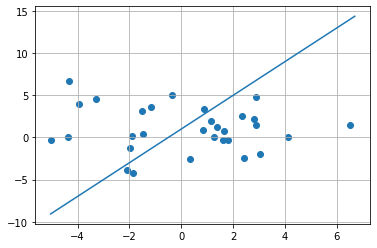

In [3]:
plt.scatter(x1[:,0],x1[:,1])
plt.plot(x,y1)
plt.grid()

In [4]:
def bound(x1,x2):
    y=np.zeros((x1.shape))
    for i in range(y.shape[0]):
        if (x2[i]<f(x1[i])):
            y[i]=-1
        else:
            y[i]=1
    return y

In [5]:
y_lab=bound(x1[:,0],x1[:,1])
print(y_lab)

[-1. -1.  1. -1.  1.  1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1.  1.
 -1.  1. -1. -1. -1.  1.  1. -1. -1. -1. -1.  1.]


In [6]:
#Create the dataset
def data(x):
    l=np.ones(x.shape[0])
    l=l.reshape(-1,1)
    X=np.concatenate((l,x),axis=1)
    return X

In [7]:
Xt=data(x1)
print(Xt)

[[ 1.00000000e+00  2.34310595e+00  2.54009887e+00]
 [ 1.00000000e+00  4.10645399e+00  4.28641202e-02]
 [ 1.00000000e+00 -3.52227230e-01  5.06823994e+00]
 [ 1.00000000e+00  3.31305753e-01 -2.58406909e+00]
 [ 1.00000000e+00 -3.92579566e+00  3.91664522e+00]
 [ 1.00000000e+00 -1.97581089e+00 -1.24225230e+00]
 [ 1.00000000e+00 -2.08644389e+00 -3.87879797e+00]
 [ 1.00000000e+00  3.03278110e+00 -1.98376511e+00]
 [ 1.00000000e+00 -4.35391736e+00 -1.28289588e-03]
 [ 1.00000000e+00 -1.90501283e+00  1.24295510e-01]
 [ 1.00000000e+00  1.15418447e+00  1.95198080e+00]
 [ 1.00000000e+00 -1.85586699e+00 -4.20052237e+00]
 [ 1.00000000e+00  6.51483959e+00  1.43503064e+00]
 [ 1.00000000e+00  1.26743051e+00  1.04850601e-01]
 [ 1.00000000e+00 -1.47952537e+00  4.12172920e-01]
 [ 1.00000000e+00 -1.52096660e+00  3.14111214e+00]
 [ 1.00000000e+00  2.40419813e+00 -2.44779089e+00]
 [ 1.00000000e+00 -4.33180137e+00  6.68917382e+00]
 [ 1.00000000e+00  1.80673304e+00 -2.58693022e-01]
 [ 1.00000000e+00 -5.03517737e+

In [8]:
# Activation function
def inp(X,w):
    yhat=np.dot(X,w)
    for i in range(yhat.shape[0]):
        if yhat[i]>=0:
            yhat[i]=1
        else:
            yhat[i]=-1
    return yhat

In [9]:
#Learning algorithm
def learn(X,y,eta,num):
    w=0.1*np.zeros((X.shape[1]))
    y_hat=inp(X,w)
    for j in range(num):
        y_hat=inp(X,w)
        for i in range(X.shape[0]):
            w=w+eta*(y[i]-y_hat[i])*X[i]
        #y_hat=inp(X,w)
        error=np.sum(np.abs(y-y_hat))
        print('learning epoch %f , error: %f' % (j,  error))
    return (w)

In [10]:
wei=learn(Xt,y_lab,0.1,20)

learning epoch 0.000000 , error: 36.000000
learning epoch 1.000000 , error: 8.000000
learning epoch 2.000000 , error: 0.000000
learning epoch 3.000000 , error: 0.000000
learning epoch 4.000000 , error: 0.000000
learning epoch 5.000000 , error: 0.000000
learning epoch 6.000000 , error: 0.000000
learning epoch 7.000000 , error: 0.000000
learning epoch 8.000000 , error: 0.000000
learning epoch 9.000000 , error: 0.000000
learning epoch 10.000000 , error: 0.000000
learning epoch 11.000000 , error: 0.000000
learning epoch 12.000000 , error: 0.000000
learning epoch 13.000000 , error: 0.000000
learning epoch 14.000000 , error: 0.000000
learning epoch 15.000000 , error: 0.000000
learning epoch 16.000000 , error: 0.000000
learning epoch 17.000000 , error: 0.000000
learning epoch 18.000000 , error: 0.000000
learning epoch 19.000000 , error: 0.000000


## Now, using the iris dataset ##

In [11]:
datair=pd.read_csv('iris.data',header=None,encoding='utf-8')
datair.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


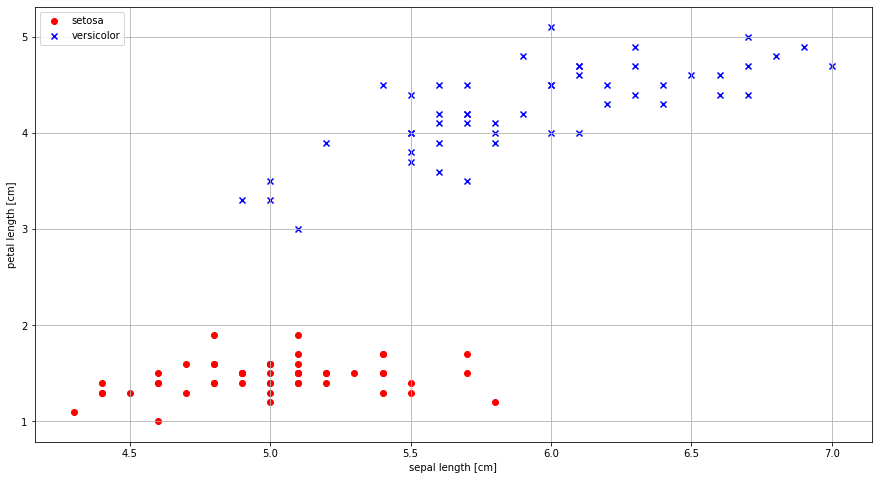

In [12]:
# select setosa and versicolor
y = datair.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = datair.iloc[0:100, [0, 2]].values

plt.figure(figsize=(15,8))
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [13]:
X2=data(X)
wei=learn(X2,y,0.01,20)

learning epoch 0.000000 , error: 100.000000
learning epoch 1.000000 , error: 100.000000
learning epoch 2.000000 , error: 100.000000
learning epoch 3.000000 , error: 100.000000
learning epoch 4.000000 , error: 100.000000
learning epoch 5.000000 , error: 94.000000
learning epoch 6.000000 , error: 100.000000
learning epoch 7.000000 , error: 0.000000
learning epoch 8.000000 , error: 0.000000
learning epoch 9.000000 , error: 0.000000
learning epoch 10.000000 , error: 0.000000
learning epoch 11.000000 , error: 0.000000
learning epoch 12.000000 , error: 0.000000
learning epoch 13.000000 , error: 0.000000
learning epoch 14.000000 , error: 0.000000
learning epoch 15.000000 , error: 0.000000
learning epoch 16.000000 , error: 0.000000
learning epoch 17.000000 , error: 0.000000
learning epoch 18.000000 , error: 0.000000
learning epoch 19.000000 , error: 0.000000


In [60]:
class Perceptron(object):
    def __init__(self,epochn,eta):
        self.epochn=epochn
        self.eta=eta
        
    def learn(self,X,y):
        self.w = np.zeros((X.shape[1]))
        for j in range(self.epochn):
            for i in range(X.shape[0]):
                self.w=self.w+(self.eta)*(y[i]-self.act(X)[i])*X[i]
            #y_hat=self.act(self.inp(X,w))    
            error=np.sum(np.abs(y-self.act(X)))
            #print('learning epoch %f, error: %f' % (j,error))
        return (self.w)
        
    def inp(self,X):
        vec=np.dot(X,self.w)
        return vec
    
    def act(self,X):
        return np.where(self.inp(X) >= 0.0, 1, -1)
        

In [62]:
def test(Xte,w):
    yhat=np.dot(Xte,w)
    for i in range(yhat.shape[0]):
        if yhat[i]>=0:
            yhat[i]=1
        else:
            yhat[i]=-1
    return yhat

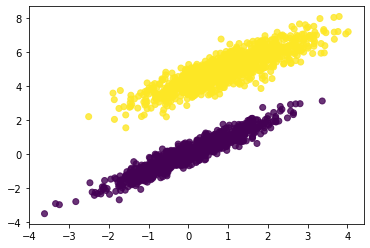

In [63]:
df = pd.read_csv("dataset.csv")
obs = 1000
plt.figure(0)
plt.scatter(df.values[:,1], df.values[:,2], c = df['3'], alpha=0.8)

In [64]:
df=df.values

In [65]:
df

array([[ 1.        , -0.38336209, -0.48799241,  0.        ],
       [ 1.        , -2.36033487, -2.44005346,  0.        ],
       [ 1.        , -0.35844329,  0.14198118,  0.        ],
       ...,
       [ 1.        ,  1.55024755,  4.89820576,  1.        ],
       [ 1.        ,  0.05916472,  4.65455151,  1.        ],
       [ 1.        ,  0.83748877,  5.21159935,  1.        ]])

In [66]:
from sklearn.model_selection import train_test_split

In [71]:
X=df[:,1:3]
y=df[:,3]

In [72]:
#Add the bias term to the X's
X=data(X)

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [74]:
pernn1=Perceptron(100,0.1)
weightsp=pernn1.learn(X_train,y_train)

In [75]:
y_hat=test(X_test,weightsp)

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
print(accuracy_score(y_hat,y_test))

0.495


In [78]:
from sklearn.linear_model import Perceptron
clf = Perceptron( eta0=0.1, shuffle=False, fit_intercept=False)
clf.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=False, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=False, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [79]:
y_predict = clf.predict(X_test)

print(clf.coef_[0])

[-0.6        -0.42098246  0.48075413]


In [80]:
weightsp

array([ 2.77555756e-17, -2.74823044e-01,  2.42614848e-01])